In [23]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
os.getcwd()
path ="/Users/hyosari/Titanic"
os.chdir(path)
os.getcwd()

'/Users/hyosari/Titanic'

In [3]:
train_set = pd.read_csv("dataset/train_set_modified.csv",sep=",",header="infer")

In [4]:
train_set.index = train_set.PassengerId

In [5]:
train_set.drop("PassengerId",inplace=True,axis=1)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train_features, val_features, train_label, val_label = train_test_split(train_set.drop("Survived",axis=1),train_set.Survived,train_size=0.8,random_state=20)

In [8]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 812 to 356
Data columns (total 10 columns):
Pclass        712 non-null int64
Age           712 non-null float64
SibSp         712 non-null int64
Parch         712 non-null int64
Fare          712 non-null float64
female        712 non-null int64
male          712 non-null int64
Embarked_C    712 non-null int64
Embarked_Q    712 non-null int64
Embarked_S    712 non-null int64
dtypes: float64(2), int64(8)
memory usage: 61.2 KB


## Decision Tree

In [9]:
from sklearn import tree
from sklearn.metrics import accuracy_score

In [10]:
clf = tree.DecisionTreeClassifier(min_samples_split = 25)
clf.fit(train_features,train_label)
pred = clf.predict(val_features)

In [11]:
accuracy = accuracy_score(pred,val_label)

In [188]:
print(round(accuracy,2))

0.83


### Feature Importances

In [157]:
clf.feature_importances_

array([ 0.14495714,  0.11712088,  0.03182406,  0.04429958,  0.21261957,
        0.        ,  0.41131784,  0.        ,  0.        ,  0.03786093])

In [158]:
print(train_features.columns[clf.feature_importances_.argmax()])

male


### Ploting using PCA

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(train_features)
val_pca_df=pd.DataFrame(pca.fit_transform(val_features),columns=["eign1","eign2"])
val_pca_df.shape

(179, 2)

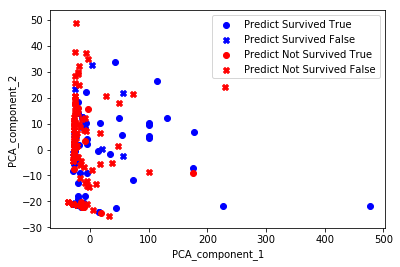

In [35]:
plt.scatter(val_pca_df.eign1[[all([a,b]) for a,b in zip(val_label==1,pred ==1)]],val_pca_df.eign2[[all([a,b]) for a,b in zip(val_label==1,pred ==1)]],c="b",marker="o")
plt.scatter(val_pca_df.eign1[[all([a,b]) for a,b in zip(val_label==1,pred ==0)]],val_pca_df.eign2[[all([a,b]) for a,b in zip(val_label==1,pred ==0)]],c="b",marker="X")
plt.scatter(val_pca_df.eign1[[all([a,b]) for a,b in zip(val_label==0,pred ==1)]],val_pca_df.eign2[[all([a,b]) for a,b in zip(val_label==0,pred ==1)]],c="r",marker="o")
plt.scatter(val_pca_df.eign1[[all([a,b]) for a,b in zip(val_label==0,pred ==0)]],val_pca_df.eign2[[all([a,b]) for a,b in zip(val_label==0,pred ==0)]],c="r",marker="X")
plt.xlabel("PCA_component_1")
plt.ylabel("PCA_component_2")
plt.legend(("Predict Survived True","Predict Survived False","Predict Not Survived True","Predict Not Survived False"))
plt.show()

## Adaboast

In [189]:
from sklearn.ensemble import AdaBoostClassifier

In [201]:
clf = AdaBoostClassifier(n_estimators=200)
clf.fit(train_features,train_label)
pred= clf.predict(val_features)
accuracy = clf.score(val_features,val_label)
print(round(accuracy,2))

0.84


In [196]:
clf.estimators_[-5:]

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
             max_features=None, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=1573178559, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
             max_features=None, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=1744909559, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
             max_features=None, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=34050577, splitter='best'),
 DecisionTreeClassifier(class_weight=No

### Feature Importances

In [200]:
clf.feature_importances_

array([ 0.02 ,  0.33 ,  0.025,  0.005,  0.585,  0.015,  0.005,  0.01 ,
        0.   ,  0.005])

In [199]:
train_features.columns[clf.feature_importances_.argmax()]

'Fare'

## Random Forest

In [208]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(min_samples_split=400)
clf.fit(train_features,train_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=400, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [209]:
accuracy = clf.score(val_features,val_label)
print(round(accuracy,2))

0.83


In [210]:
clf.estimators_[-5:]

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=400, min_weight_fraction_leaf=0.0,
             presort=False, random_state=2137760665, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=400, min_weight_fraction_leaf=0.0,
             presort=False, random_state=178942920, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=400, min_weight_fraction_leaf=0.0,
             presort=False, random_state=1334100339, splitter='best'),
 DecisionTreeClas

### Feature importances

In [211]:
clf.feature_importances_

array([ 0.1,  0. ,  0. ,  0. ,  0.2,  0.3,  0.4,  0. ,  0. ,  0. ])

In [212]:
train_features.columns[clf.feature_importances_.argmax()]

'male'